### We Are Going To implement Text Classification on an SMS dataset and classify it as spam on not spam based on the Vector's Formed by the Technique's
### Of BoW and TF-IDF and make use of logistic regression to predict output based on this dataset.

you can download the data from:-
https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

Now we are going to Load the Datset

In [6]:
df = pd.read_csv('C:/Users/7a42b\ML_Jupyter/NLP/sms+spam+collection/SMSSpamCollection' ,sep = "\t" , header = None , names = ["label" , "text"])

Both ways to read directory if the unicode error is buggin fix the backslash or add the 'r' letter in front

In [8]:
df2 = pd.read_csv(
    r"C:\Users\7a42b\ML_Jupyter\NLP\sms+spam+collection\SMSSpamCollection",
    sep="\t",
    header=None,
    names=["label", "text"]
)

In [54]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
# df.head() #showcasing the dataset
df[:10]

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Splitting our data for training and testing

In [33]:
y = df["label"]
x = df["text"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 42 , stratify = y)

In [34]:
print(x.shape , y.shape)

(5572,) (5572,)


### Bag of Words Representation BoW

1. The CountVectorizer creates a "vocabulary" (a unique index for each word)
Then
1. The "Vocabulary" Phase (Dataset Level)The vectorizer looks at every single word in your entire training dataset. 
   It makes a master list of unique words.If your dataset has 10,000 sentences and the word "pizza" appears at least once, "pizza" gets assigned to a specific        column index (e.g., Column #42).
2. The "Counting" Phase (Sentence Level)Now, the vectorizer goes back to each individual sentence and fills in the counts for that specific row.Example:Imagine       these are two rows in your dataset:Row 1: "The cat sat on the mat."Row 2: "The cat is a good cat."The resulting BoW matrix would look like this:Row    #thecatsatonmatisgoodRow 12111100Row 21200011

#### How to Read the Coordinates
Your output likely looks something like this: (0, 142) 1 (0, 58) 2 (1, 142) 1

Here is what those numbers actually represent:

The first number (0, ...): This is the Row Index (the sentence number). 0 means the first sentence in your x_train.

The second number (..., 142): This is the Column Index (the word ID). Instead of storing the string "apple", the computer assigned "apple" to index 142.

The final number 1: This is the Count. It means the word at index 142 appears 1 time in the first sentence.

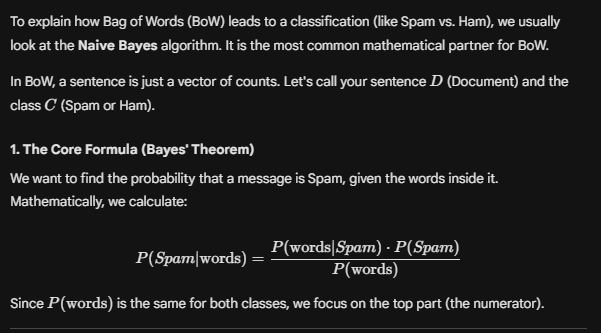

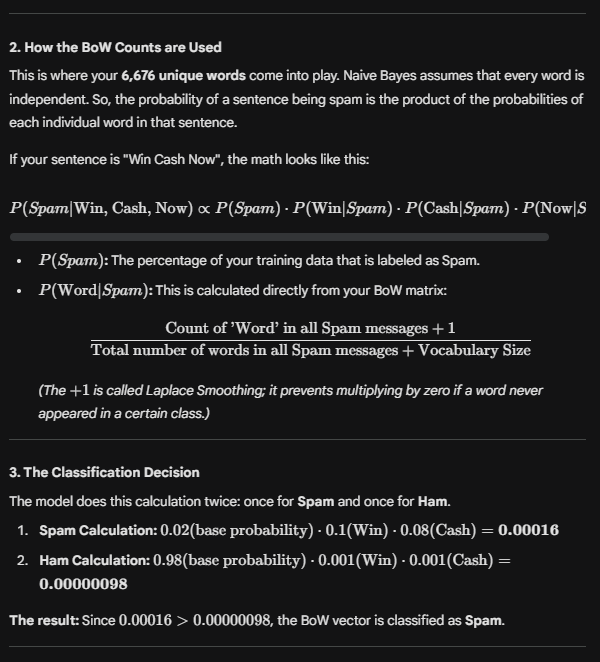

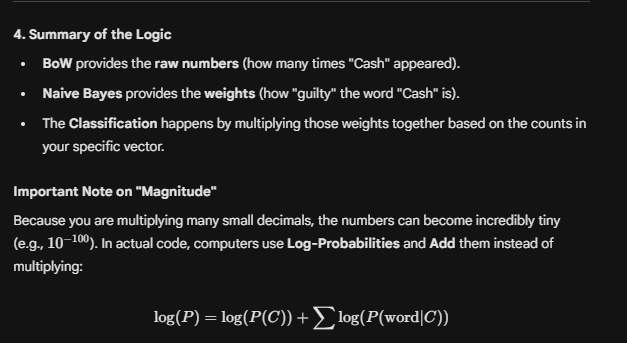

## NOW BUT WE USED LOGISTIC REG FOR BoW so here goees what we have done in this

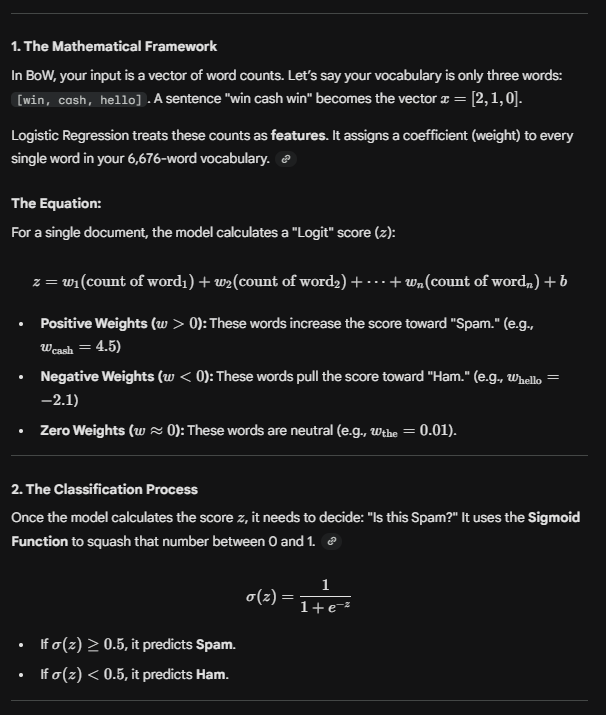

#### Then using the same logistic regression logic it trains on the dataset the weights and biases and in the end it make the prediction's 

In [35]:
bow_vectorizer = CountVectorizer(lowercase = True , stop_words = "english")

x_train_bow = bow_vectorizer.fit_transform(x_train)
x_test_bow = bow_vectorizer.transform(x_test) #note : (No 'fit' here!)

print("BoW Train Shape:\n" ,x_train_bow[:10])

BoW Train Shape:
   (0, 6631)	1
  (0, 2793)	1
  (0, 3048)	1
  (1, 6264)	1
  (1, 1197)	1
  (1, 1038)	1
  (1, 478)	2
  (1, 4542)	1
  (1, 3232)	1
  (1, 1473)	1
  (1, 103)	1
  (1, 1604)	1
  (1, 668)	1
  (1, 4544)	1
  (1, 6491)	1
  (1, 3909)	1
  (1, 479)	1
  (1, 4324)	1
  (1, 123)	1
  (2, 1473)	1
  (2, 3637)	1
  (2, 5874)	1
  (2, 3315)	1
  (3, 6631)	1
  (3, 894)	1
  :	:
  (4, 979)	1
  (4, 4794)	1
  (5, 6188)	1
  (5, 5890)	1
  (5, 1933)	1
  (5, 4885)	1
  (5, 4819)	1
  (6, 2934)	1
  (6, 5149)	1
  (6, 2110)	1
  (7, 6034)	1
  (7, 2062)	1
  (7, 5880)	1
  (7, 1813)	1
  (7, 5291)	1
  (7, 2820)	1
  (8, 4710)	1
  (8, 2204)	1
  (8, 5606)	1
  (8, 5920)	1
  (9, 6382)	1
  (9, 5853)	1
  (9, 4017)	1
  (9, 6379)	1
  (9, 689)	1


In [37]:
words = bow_vectorizer.get_feature_names_out()
dense_matrix = x_train_bow[:5].toarray()

df3 = pd.DataFrame(dense_matrix, columns=words)
print(df3) #this shows the earlier interpretation of what we had the columns are all the unique names we have found

   00  000  000pes  008704050406  0089  0121  01223585334  02  0207  \
0   0    0       0             0     0     0            0   0     0   
1   0    0       0             0     0     0            0   0     0   
2   0    0       0             0     0     0            0   0     0   
3   0    0       0             0     0     0            0   0     0   
4   0    0       0             0     0     0            0   0     0   

   02072069400  ...  zed  zeros  zhong  zindgi  zoe  zogtorius  zyada  èn  ú1  \
0            0  ...    0      0      0       0    0          0      0   0   0   
1            0  ...    0      0      0       0    0          0      0   0   0   
2            0  ...    0      0      0       0    0          0      0   0   0   
3            0  ...    0      0      0       0    0          0      0   0   0   
4            0  ...    0      0      0       0    0          0      0   0   0   

   〨ud  
0    0  
1    0  
2    0  
3    0  
4    0  

[5 rows x 6676 columns]


In [42]:
print("Unique names " , words.shape)

Unique names  (6676,)


In [45]:
word_counts = x_train_bow.sum(axis=0) #summing returns the overall frequqnce across all rows of each word

freq_list = [(word, word_counts[0, idx]) for word, idx in bow_vectorizer.vocabulary_.items()]

# 3. Sort them to see the top 10
freq_list = sorted(freq_list, key=lambda x: x[1], reverse=True)

print("Top 10 Most Frequent Words:")
for word, count in freq_list[:10]:
    print(f"{word}: {count}")

Top 10 Most Frequent Words:
ur: 251
just: 241
ll: 195
free: 194
gt: 194
lt: 191
ok: 187
know: 180
day: 169
good: 169


In [47]:
bow_model = LogisticRegression(max_iter=1000)
bow_model.fit(x_train_bow , y_train)

LogisticRegression(max_iter=1000)

In [49]:
bow_preds = bow_model.predict(x_test_bow)

In [50]:
print("========== BAG OF WORDS RESULTS ==========")
print("Accuracy:", accuracy_score(y_test, bow_preds))
print("\nClassification Report:")
print(classification_report(y_test, bow_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, bow_preds), "\n")

========== BAG OF WORDS RESULTS ==========
Accuracy: 0.9771615008156607

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1592
        spam       1.00      0.83      0.91       247

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839

Confusion Matrix:
[[1591    1]
 [  41  206]] 




# ============================================================
## TF-IDF + LOGISTIC REGRESSION
# ============================================================

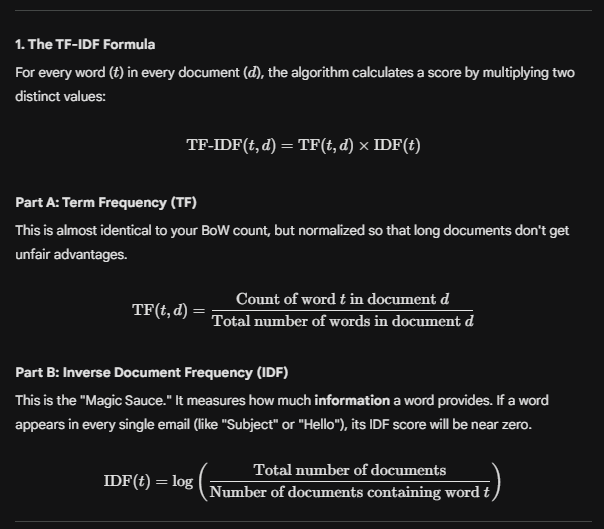

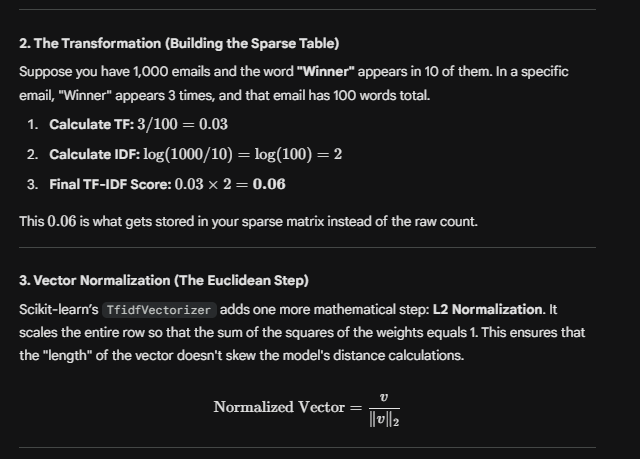

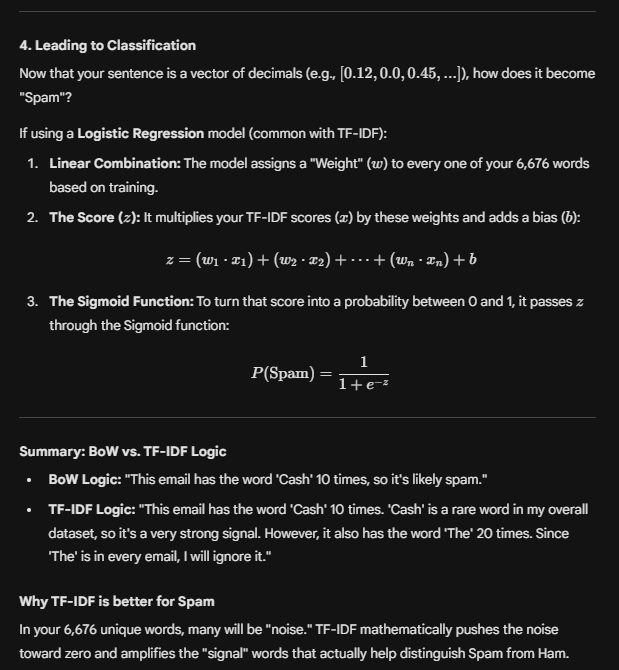

In [56]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True , stop_words = "english")

In [63]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

print("BoW Train Shape:\n" ,x_train_tfidf[:10])

BoW Train Shape:
   (0, 3048)	0.49849906226090784
  (0, 2793)	0.5065788510629959
  (0, 6631)	0.7034746282423344
  (1, 123)	0.27927404841967324
  (1, 4324)	0.27927404841967324
  (1, 479)	0.19686959609046897
  (1, 3909)	0.1877733502226308
  (1, 6491)	0.25545381971931114
  (1, 4544)	0.2288828972903247
  (1, 668)	0.29320798896798683
  (1, 1604)	0.17005919306991116
  (1, 103)	0.29320798896798683
  (1, 1473)	0.18259027247596085
  (1, 3232)	0.29320798896798683
  (1, 4542)	0.20781336231858694
  (1, 478)	0.3788202072885256
  (1, 1038)	0.20641050117632292
  (1, 1197)	0.2693877602676248
  (1, 6264)	0.1741068454661764
  (2, 3315)	0.6997766155862979
  (2, 5874)	0.3969012018716629
  (2, 3637)	0.3575127092922358
  (2, 1473)	0.47430663807914525
  (3, 6000)	0.4802522476177408
  (3, 894)	0.6917804284240867
  :	:
  (4, 1174)	0.3820542582634075
  (4, 1299)	0.4347989646225232
  (5, 4819)	0.45131873611782475
  (5, 4885)	0.5132665941578332
  (5, 1933)	0.3074895935246917
  (5, 5890)	0.3846198678425475
  (5, 6

In [64]:
words1 = bow_vectorizer.get_feature_names_out()
dense_matrix1 = x_train_tfidf[:5].toarray()

df4 = pd.DataFrame(dense_matrix1, columns=words)
print(df4) #this shows the earlier interpretation of what we had the columns are all the unique names we have found

    00  000  000pes  008704050406  0089  0121  01223585334   02  0207  \
0  0.0  0.0     0.0           0.0   0.0   0.0          0.0  0.0   0.0   
1  0.0  0.0     0.0           0.0   0.0   0.0          0.0  0.0   0.0   
2  0.0  0.0     0.0           0.0   0.0   0.0          0.0  0.0   0.0   
3  0.0  0.0     0.0           0.0   0.0   0.0          0.0  0.0   0.0   
4  0.0  0.0     0.0           0.0   0.0   0.0          0.0  0.0   0.0   

   02072069400  ...  zed  zeros  zhong  zindgi  zoe  zogtorius  zyada   èn  \
0          0.0  ...  0.0    0.0    0.0     0.0  0.0        0.0    0.0  0.0   
1          0.0  ...  0.0    0.0    0.0     0.0  0.0        0.0    0.0  0.0   
2          0.0  ...  0.0    0.0    0.0     0.0  0.0        0.0    0.0  0.0   
3          0.0  ...  0.0    0.0    0.0     0.0  0.0        0.0    0.0  0.0   
4          0.0  ...  0.0    0.0    0.0     0.0  0.0        0.0    0.0  0.0   

    ú1  〨ud  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows

In [67]:
print("Unique names of Tf IDF should be same  " , words1.shape) # and they are

Unique names of Tf IDF should be same   (6676,)


In [68]:
weights = np.asarray(x_train_tfidf.mean(axis=0)).ravel().tolist()

# Create a DataFrame to see the top "important" words
tfidf_df = pd.DataFrame({'word': words1, 'weight': weights})
print(tfidf_df.sort_values(by='weight', ascending=False).head(10))

       word    weight
4279     ok  0.018253
3637     ll  0.015418
3382   just  0.012750
1681   come  0.011991
2873     gt  0.011456
2804   good  0.011306
3716     lt  0.011246
6212     ur  0.011015
3458   know  0.010827
5494  sorry  0.010774


In [61]:
tfidf_model = LogisticRegression(max_iter=1000)
tfidf_model.fit(X_train_tfidf, y_train)

tfidf_preds = tfidf_model.predict(X_test_tfidf)

In [62]:
print("========== TF-IDF RESULTS ==========")
print("Accuracy:", accuracy_score(y_test, tfidf_preds))
print("\nClassification Report:")
print(classification_report(y_test, tfidf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, tfidf_preds))

========== TF-IDF RESULTS ==========
Accuracy: 0.9630233822729745

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1592
        spam       1.00      0.72      0.84       247

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839

Confusion Matrix:
[[1592    0]
 [  68  179]]


### So we can see the two algorithms work very well for classification tasks of spam or ham but these methods are limited to these tasks as the vector's of the two methods just store the frequencies and have no major information stored in them and hence they cannot be used for adcanved NLP application's as these vector's lack so much info about the statement itself